In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [0]:
shop=pd.read_csv('online.csv')

In [3]:
shop.head()


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [4]:
shop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
Administrative             12330 non-null int64
Administrative_Duration    12330 non-null float64
Informational              12330 non-null int64
Informational_Duration     12330 non-null float64
ProductRelated             12330 non-null int64
ProductRelated_Duration    12330 non-null float64
BounceRates                12330 non-null float64
ExitRates                  12330 non-null float64
PageValues                 12330 non-null float64
SpecialDay                 12330 non-null float64
Month                      12330 non-null object
OperatingSystems           12330 non-null int64
Browser                    12330 non-null int64
Region                     12330 non-null int64
TrafficType                12330 non-null int64
VisitorType                12330 non-null object
Weekend                    12330 non-null bool
Revenue                    12330 non-null bool
dtypes: bool(

In [5]:
shop.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157213,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


In [6]:
print('There are',shop.shape[0],'rows and ',shop.shape[1],'columns' )

There are 12330 rows and  18 columns


## 1.Data Cleaning

### 1.1 Checking and treating duplicates

In [7]:
shop.duplicated().sum()

125

##### Eventhough it has 125 duplicate rows we wont drop those duplicates because repetition will provide weight of evidence.Depending on kind of the model we need to drop it

### 1.2 Checking and treating nulls

In [8]:
shop.isna().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

### 1.3 Checking for faulty values and Imputing values 

In [9]:
shop.apply(lambda x:x==0).sum()

Administrative              5768
Administrative_Duration     5903
Informational               9699
Informational_Duration      9925
ProductRelated                38
ProductRelated_Duration      755
BounceRates                 5518
ExitRates                     76
PageValues                  9600
SpecialDay                 11079
Month                          0
OperatingSystems               0
Browser                        0
Region                         0
TrafficType                    0
VisitorType                    0
Weekend                     9462
Revenue                    10422
dtype: int64

##### Administrative and Administrative_duration have difference in their 0.Since one who visit administrative page will definitely spend their time on it which means Administrative_duration.Lets do something for it

In [10]:
((shop['Administrative']>0) & (shop['Administrative_Duration']==0)).sum()

135

##### Informational and Informational_duration have difference in their 0.Since one who visit Informational page will definitely spend their time on it which means Informational_duration.Lets do something for it

In [11]:
((shop['Informational']>0) & (shop['Informational_Duration']==0)).sum()

226

##### ProductRelated and ProductRelated_duration have difference in their 0.Since one who visit Informational page will definitely spend their time on it which means ProductRelated_duration.Lets do something for it

In [12]:
((shop['ProductRelated']>0) & (shop['ProductRelated_Duration']==0)).sum()

717

#### 1.3.1 Imputation using mean/median/mode

1. For Administrative

In [13]:
median_admin=shop['Administrative_Duration'].groupby(shop['Administrative']).median().reset_index(name='Duration_mean')
median_admin

,Administrative,Duration_mean
0,0,0.000000
1,1,20.100000
2,2,48.916667
3,3,74.000000
4,4,93.500000
5,5,112.333333
6,6,136.102778
7,7,150.750000
8,8,185.000000
9,9,210.666667


In [14]:
for i in range(0,len(shop)):
    if (shop.iloc[i,0]==1) & (shop.iloc[i,1]==0):
        shop.iloc[i,1]=20.10000
    if (shop.iloc[i,0]==2) & (shop.iloc[i,1]==0):
        shop.iloc[i,1]=48.916667
shop[(shop['Administrative']>0)&(shop['Administrative_Duration']==0)]

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue


2. For Informational

In [15]:
shop['Informational_Duration'].groupby(shop['Informational']).median().reset_index(name='Duration_median')

,Informational,Duration_median
0,0,0.000000
1,1,23.500000
2,2,55.500000
3,3,110.875000
4,4,164.833333
5,5,242.750000
6,6,289.500000
7,7,299.966667
8,8,412.750000
9,9,435.450000


In [16]:
shop[(shop['Informational']>0) & (shop['Informational_Duration']==0)]['Informational'].unique()

array([1, 2])

In [0]:
for i in range(0,len(shop)):
    if (shop.iloc[i,2]==1) & (shop.iloc[i,3]==0):
        shop.iloc[i,3]=23.50000
for i in range(0,len(shop)):
    if (shop.iloc[i,2]==2) & (shop.iloc[i,3]==0):
        shop.iloc[i,3]=55.500000

In [18]:
shop[(shop['Informational']>0) & (shop['Informational_Duration']==0)]['Informational'].unique()

array([], dtype=int64)

3. For ProductRelated

In [19]:
shop['ProductRelated_Duration'].groupby(shop['ProductRelated']).median().reset_index(name='Duration_median')

,ProductRelated,Duration_median
0,0,0.000000
1,1,0.000000
2,2,20.100000
3,3,55.200000
4,4,78.916667
5,5,111.625000
6,6,148.325000
7,7,186.400000
8,8,213.916667
9,9,248.050000


In [20]:
shop[(shop['ProductRelated']>0) & (shop['ProductRelated_Duration']==0)]['ProductRelated'].unique()

array([ 1,  2,  4,  3,  5, 13,  9, 10, 11,  6,  7])

In [0]:
for i in range(0,len(shop)):
    if (shop.iloc[i,4]==2) & (shop.iloc[i,5]==0):
        shop.iloc[i,5]=20.100000
for i in range(0,len(shop)):
    if (shop.iloc[i,4]==3) & (shop.iloc[i,5]==0):
        shop.iloc[i,5]=55.200000
for i in range(0,len(shop)):
    if (shop.iloc[i,4]==4) & (shop.iloc[i,5]==0):
        shop.iloc[i,5]=78.916667
for i in range(0,len(shop)):
    if (shop.iloc[i,4]==5) & (shop.iloc[i,5]==0):
        shop.iloc[i,5]=111.625000
for i in range(0,len(shop)):
    if (shop.iloc[i,4]==6) & (shop.iloc[i,5]==0):
        shop.iloc[i,5]=148.325000
for i in range(0,len(shop)):
    if (shop.iloc[i,4]==7) & (shop.iloc[i,5]==0):
        shop.iloc[i,5]=186.400000
for i in range(0,len(shop)):
    if (shop.iloc[i,4]==9) & (shop.iloc[i,5]==0):
        shop.iloc[i,5]=248.050000
for i in range(0,len(shop)):
    if (shop.iloc[i,4]==10) & (shop.iloc[i,5]==0):
        shop.iloc[i,5]=248.050000
for i in range(0,len(shop)):
    if (shop.iloc[i,4]==11) & (shop.iloc[i,5]==0):
        shop.iloc[i,5]=359.966667
for i in range(0,len(shop)):
    if (shop.iloc[i,4]==13) & (shop.iloc[i,5]==0):
        shop.iloc[i,5]=354.283333

In [22]:
shop[(shop['ProductRelated']>0) & (shop['ProductRelated_Duration']==0)]['ProductRelated'].unique()

array([1])

##### 1 is not being replaced because its median value is 0

#### If BounceRate has some value and admin,info,productrelated can not be 0 

In [26]:
shop[(shop['Administrative']==0) & (shop['Informational']==0) & (shop['ProductRelated']==0)]

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
2683,0,0.0,0,0.0,0,0.0,0.0,0.200000,0.0,0.0,May,3,2,3,18,Returning_Visitor,True,False
3187,0,0.0,0,0.0,0,0.0,0.0,0.200000,0.0,0.0,May,2,2,8,3,Returning_Visitor,False,False
5557,0,0.0,0,0.0,0,0.0,0.0,0.200000,0.0,0.0,Nov,1,1,9,3,Returning_Visitor,False,False
5800,0,0.0,0,0.0,0,0.0,0.0,0.181818,0.0,0.0,June,2,2,7,6,Returning_Visitor,False,False
8052,0,0.0,0,0.0,0,0.0,0.0,0.200000,0.0,0.0,Nov,1,1,9,2,Returning_Visitor,False,False
11865,0,0.0,0,0.0,0,0.0,0.0,0.200000,0.0,0.0,Nov,1,1,8,8,Returning_Visitor,False,False


In [0]:
for i in range(0,len(shop)):
    if ((shop.iloc[i,0]==0) & (shop.iloc[i,2]==0) & (shop.iloc[i,4]==0) & (shop.iloc[i,6]>0)):
        shop.iloc[i,6]=0

In [28]:
shop[(shop['Administrative']==0) & (shop['Informational']==0) & (shop['ProductRelated']==0)]

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
2683,0,0.0,0,0.0,0,0.0,0.0,0.200000,0.0,0.0,May,3,2,3,18,Returning_Visitor,True,False
3187,0,0.0,0,0.0,0,0.0,0.0,0.200000,0.0,0.0,May,2,2,8,3,Returning_Visitor,False,False
5557,0,0.0,0,0.0,0,0.0,0.0,0.200000,0.0,0.0,Nov,1,1,9,3,Returning_Visitor,False,False
5800,0,0.0,0,0.0,0,0.0,0.0,0.181818,0.0,0.0,June,2,2,7,6,Returning_Visitor,False,False
8052,0,0.0,0,0.0,0,0.0,0.0,0.200000,0.0,0.0,Nov,1,1,9,2,Returning_Visitor,False,False
11865,0,0.0,0,0.0,0,0.0,0.0,0.200000,0.0,0.0,Nov,1,1,8,8,Returning_Visitor,False,False


#### If ExitRates has some value and admin,info,productrelated can not be 0 

In [0]:
for i in range(0,len(shop)):
    if ((shop.iloc[i,0]==0) & (shop.iloc[i,2]==0) & (shop.iloc[i,4]==0) & (shop.iloc[i,7]>0)):
        shop.iloc[i,7]=0

In [30]:
shop[(shop['Administrative']==0) & (shop['Informational']==0) & (shop['ProductRelated']==0)]

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
2683,0,0.0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,May,3,2,3,18,Returning_Visitor,True,False
3187,0,0.0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,May,2,2,8,3,Returning_Visitor,False,False
5557,0,0.0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,Nov,1,1,9,3,Returning_Visitor,False,False
5800,0,0.0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,June,2,2,7,6,Returning_Visitor,False,False
8052,0,0.0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,Nov,1,1,9,2,Returning_Visitor,False,False
11865,0,0.0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,Nov,1,1,8,8,Returning_Visitor,False,False


#### If PageValues is 0 Then Revenue can not be True

In [31]:
shop[(shop['PageValues']==0) & (shop['Revenue']==True)]

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
5490,3,13.733333,1,2.00,27,407.683333,0.006667,0.011556,0.0,0.0,Jul,2,2,1,4,Returning_Visitor,False,True
5514,1,41.400000,0,0.00,30,558.611111,0.009091,0.046465,0.0,0.0,Sep,2,10,2,1,Returning_Visitor,False,True
5554,10,491.666667,0,0.00,48,1939.571111,0.003774,0.010539,0.0,0.0,Nov,2,2,7,20,Returning_Visitor,False,True
5561,17,698.133333,1,9.00,83,4306.612355,0.001075,0.019376,0.0,0.0,Oct,7,1,2,1,Returning_Visitor,True,True
5563,3,32.200000,0,0.00,81,1199.616667,0.000000,0.006173,0.0,0.0,Sep,2,2,2,1,Returning_Visitor,True,True
5580,1,44.000000,0,0.00,1,0.000000,0.000000,0.066667,0.0,0.0,Sep,1,1,1,5,New_Visitor,False,True
5592,2,268.080000,0,0.00,13,420.246667,0.042105,0.064912,0.0,0.0,Sep,3,2,1,13,Returning_Visitor,True,True
5593,1,22.200000,0,0.00,5,136.100000,0.066667,0.066667,0.0,0.0,Oct,1,1,1,20,Returning_Visitor,False,True
5622,1,12.000000,0,0.00,0,0.000000,0.000000,0.022222,0.0,0.0,Aug,3,2,6,2,Returning_Visitor,True,True
5656,2,194.900000,0,0.00,14,227.333333,0.000000,0.009184,0.0,0.0,Nov,1,1,4,3,Returning_Visitor,False,True


In [32]:
temp=shop['PageValues'].groupby([shop['Administrative'],shop['Informational'],shop['ProductRelated']]).mean().reset_index()
temp.head()

,Administrative,Informational,ProductRelated,PageValues
0,0,0,0,0.000000
1,0,0,1,0.183993
2,0,0,2,0.219656
3,0,0,3,0.843937
4,0,0,4,0.747517


for i in range(0,len(shop)):


```
# This is formatted as code
```

  for j in range(0,len(temp)):
        if ((shop.iloc[i,0]==temp.iloc[j,0]) &(shop.iloc[i,2]==temp.iloc[j,1]) &(shop.iloc[i,4]==temp.iloc[j,2]) & (shop.iloc[i,17]==True)):
            #print('(',i,',',j,')')
            shop.iloc[i,8]=temp.iloc[j,3]

In [0]:
for i in range(0,len(shop)):

# This is formatted as code
  for j in range(0,len(temp)): 
     if ((shop.iloc[i,0]==temp.iloc[j,0]) &(shop.iloc[i,2]==temp.iloc[j,1]) &(shop.iloc[i,4]==temp.iloc[j,2]) & (shop.iloc[i,17]==True)):

        #print('(',i,',',j,')')
        shop.iloc[i,8]=temp.iloc[j,3]

## 2.Exploratory Data Analysis

### 2.1 Univariate Analysis

#### 1.)Administrative

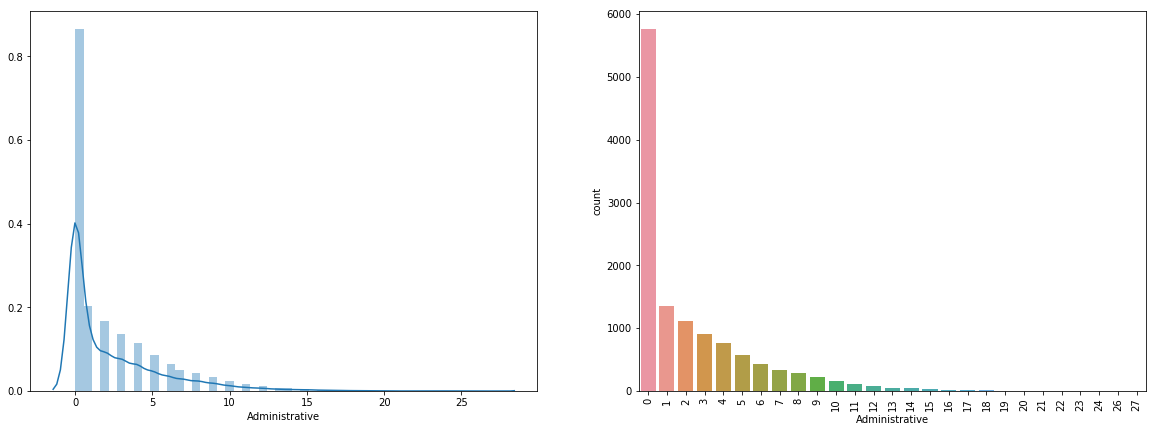

In [35]:
fig,ax=plt.subplots(1,2,figsize=(20,7))
sns.distplot(shop['Administrative'],ax=ax[0])
sns.countplot(shop['Administrative'],ax=ax[1])
plt.xticks(rotation=90)
#sns.boxplot(shop['Administrative'],ax=ax[2],orient='v')
plt.show()

#### 2)Administrative_Duration

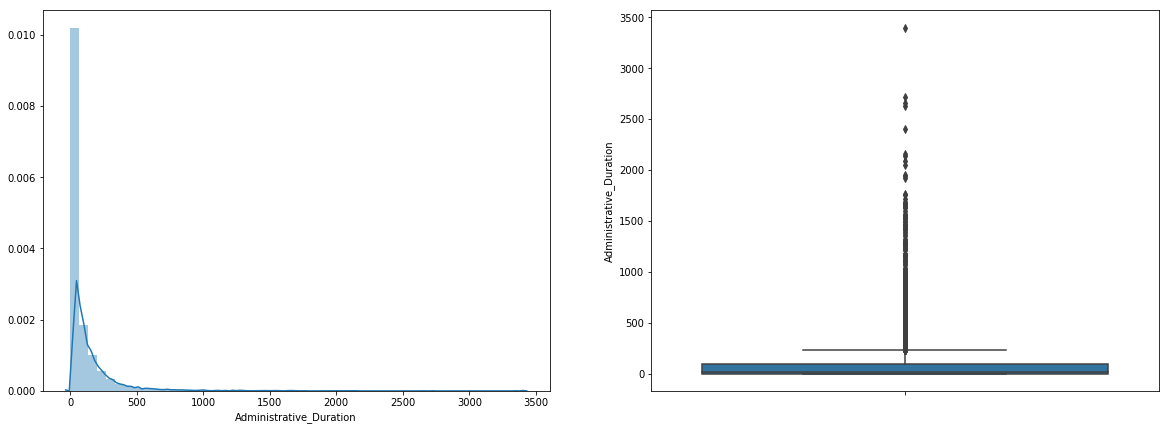

In [36]:
fig,ax=plt.subplots(1,2,figsize=(20,7))
sns.distplot(shop['Administrative_Duration'],ax=ax[0])
sns.boxplot(shop['Administrative_Duration'],ax=ax[1],orient='v')
plt.show()

#### 3)Informational

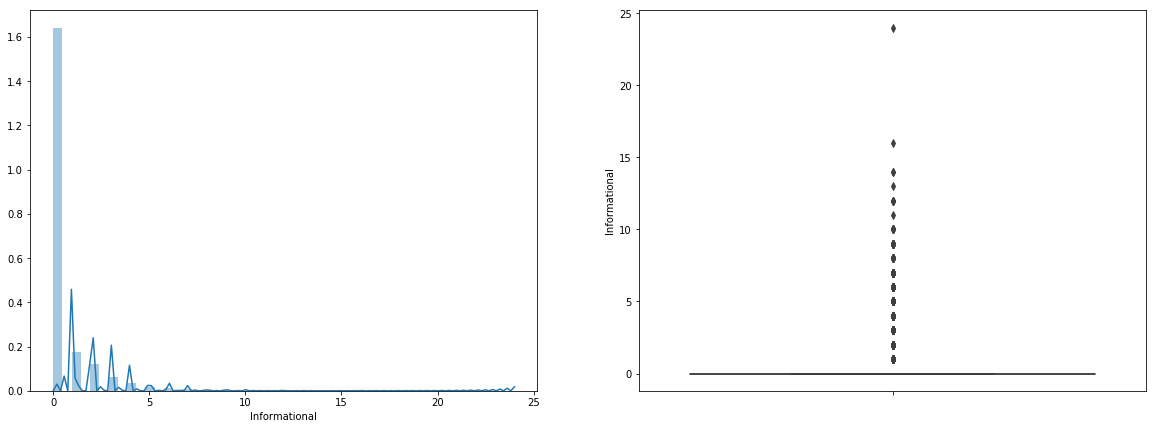

In [37]:
fig,ax=plt.subplots(1,2,figsize=(20,7))
sns.distplot(shop['Informational'],ax=ax[0])
#sns.countplot(shop['Informational'],ax=ax[1])
plt.xticks(rotation=90)
sns.boxplot(shop['Informational'],ax=ax[1],orient='v')
plt.show()

#### 4)Informational_Duration

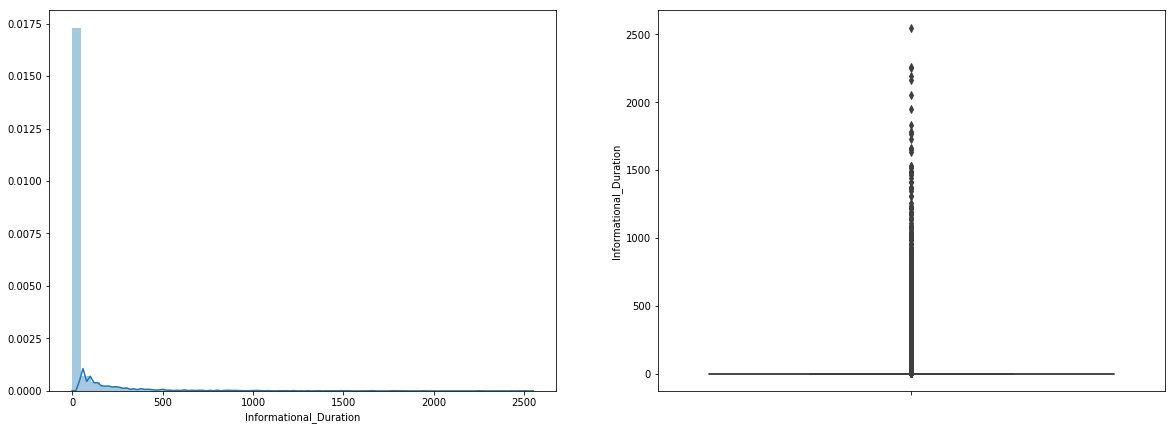

In [38]:
fig,ax=plt.subplots(1,2,figsize=(20,7))
sns.distplot(shop['Informational_Duration'],ax=ax[0])
sns.boxplot(shop['Informational_Duration'],ax=ax[1],orient='v')
plt.show()

#### 5)ProductRelated

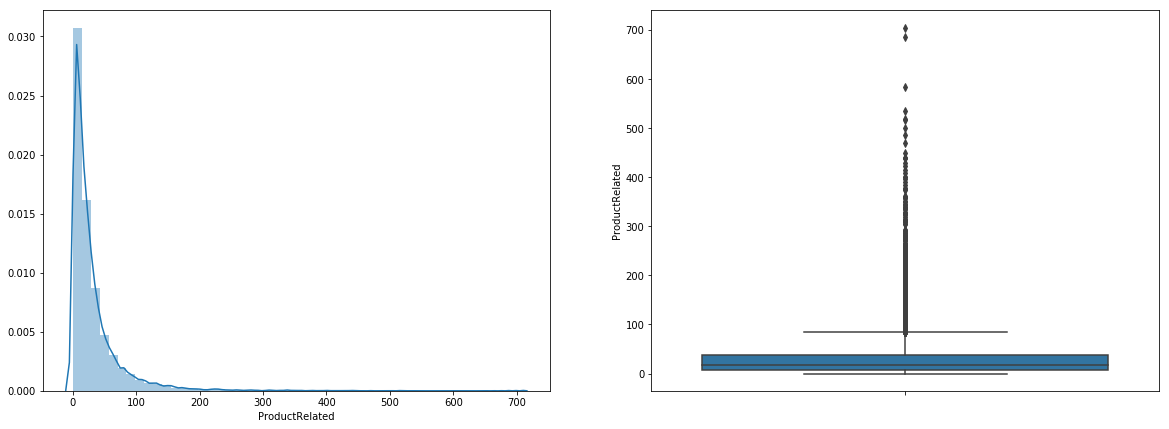

In [39]:
fig,ax=plt.subplots(1,2,figsize=(20,7))
sns.distplot(shop['ProductRelated'],ax=ax[0])
sns.boxplot(shop['ProductRelated'],ax=ax[1],orient='v')
plt.show()

#### 6)ProductRelated_Duration

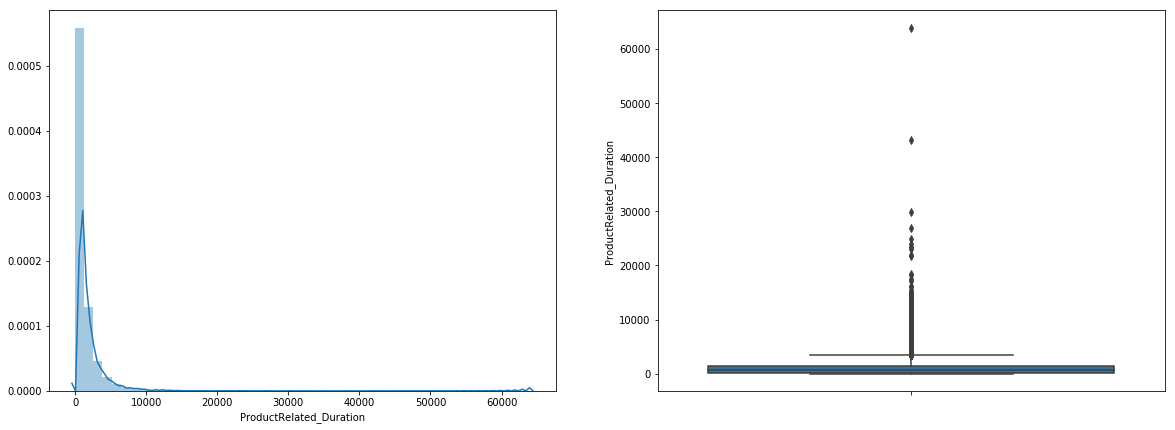

In [40]:
fig,ax=plt.subplots(1,2,figsize=(20,7))
sns.distplot(shop['ProductRelated_Duration'],ax=ax[0])
sns.boxplot(shop['ProductRelated_Duration'],ax=ax[1],orient='v')
plt.show()

#### 7)ExitRates and BounceRates

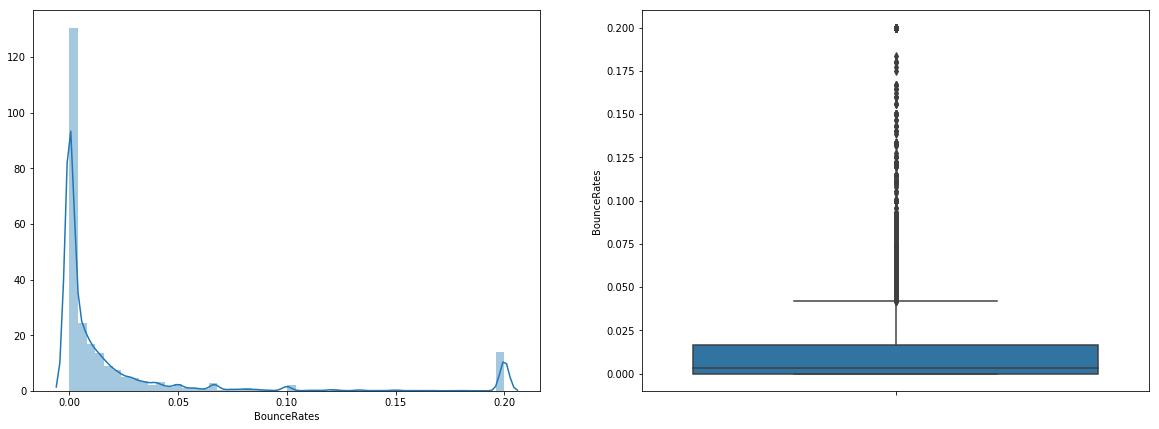

In [41]:
fig,ax=plt.subplots(1,2,figsize=(20,7))
sns.distplot(shop['BounceRates'],ax=ax[0])
sns.boxplot(shop['BounceRates'],ax=ax[1],orient='v')
plt.show()

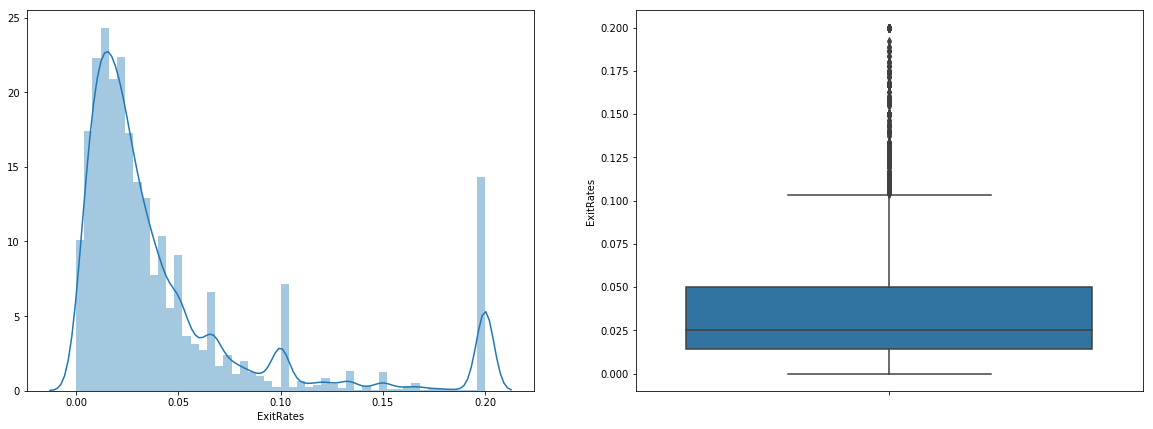

In [42]:
fig,ax=plt.subplots(1,2,figsize=(20,7))
sns.distplot(shop['ExitRates'],ax=ax[0])
sns.boxplot(shop['ExitRates'],ax=ax[1],orient='v')
plt.show()

#### 8)SpecialDay & Revenue

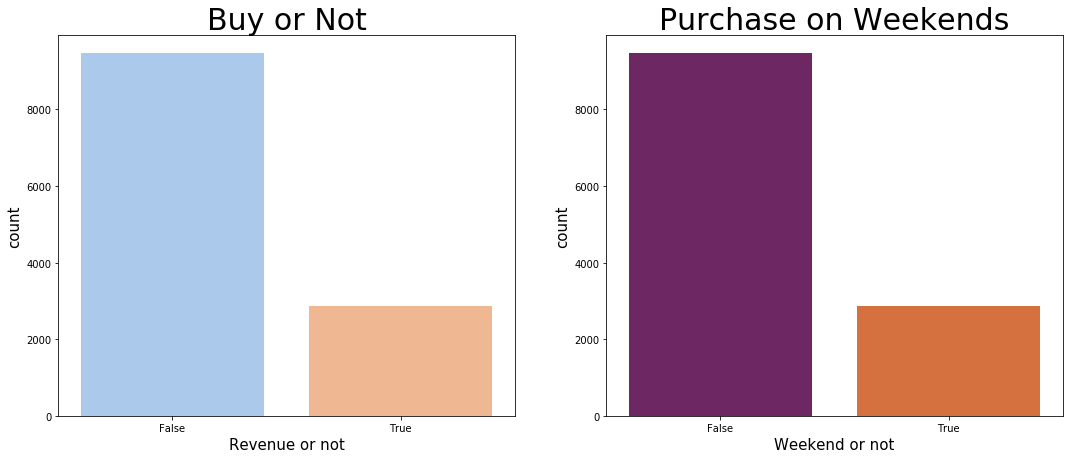

In [43]:
# checking the Distribution of customers on Revenue

plt.rcParams['figure.figsize'] = (18, 7)

plt.subplot(1, 2, 1)
sns.countplot(shop['Weekend'], palette = 'pastel')
plt.title('Buy or Not', fontsize = 30)
plt.xlabel('Revenue or not', fontsize = 15)
plt.ylabel('count', fontsize = 15)


# checking the Distribution of customers on Weekend
plt.subplot(1, 2, 2)
sns.countplot(shop['Weekend'], palette = 'inferno')
plt.title('Purchase on Weekends', fontsize = 30)
plt.xlabel('Weekend or not', fontsize = 15)
plt.ylabel('count', fontsize = 15)

plt.show()

#### 9)SpecialDays and Browser

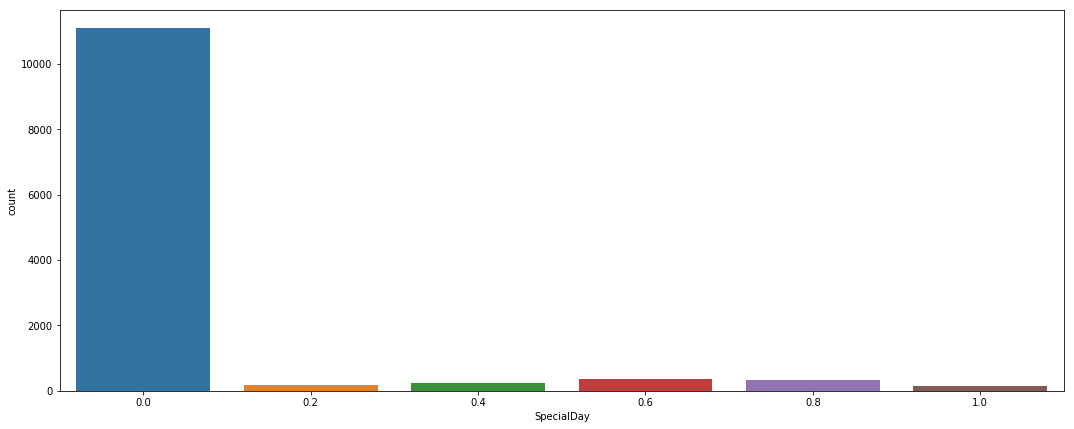

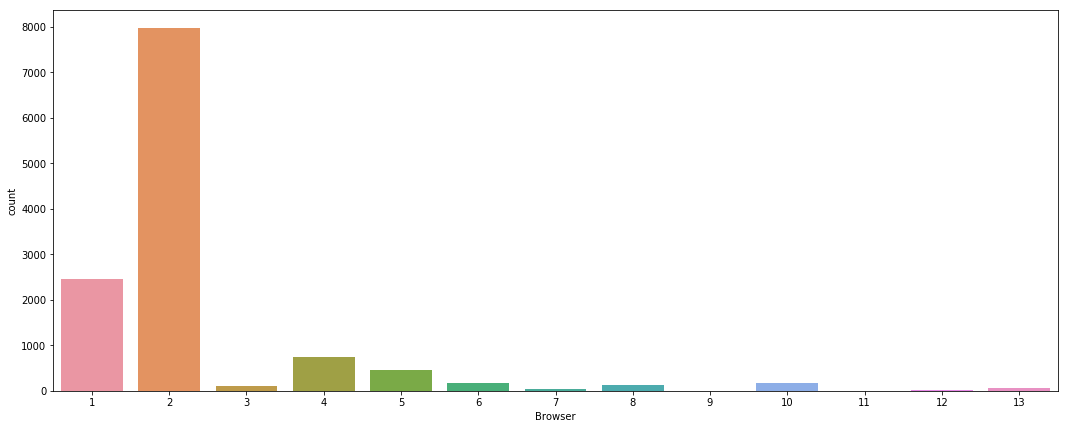

In [44]:
#plt.subplots(1,2,figsize=(15,6))
sns.countplot(shop['SpecialDay'])
plt.show()
sns.countplot(shop['Browser'])
plt.show()
#plt.show()

### 2.2)Bivariate Analysis

#### 2.2.1 Weekend vs Revenue

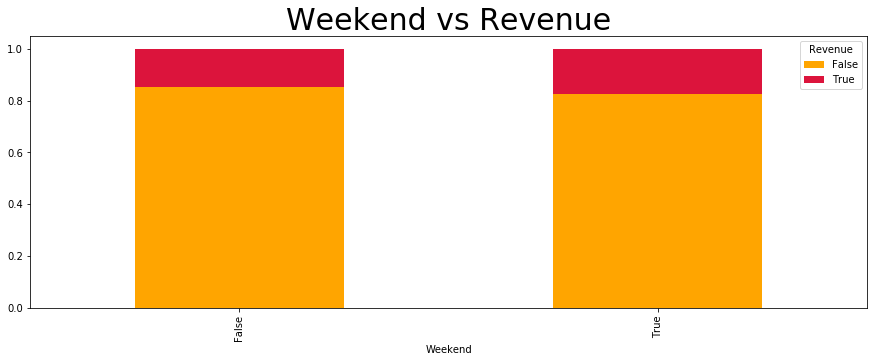

In [45]:
df = pd.crosstab(shop['Weekend'], shop['Revenue'])
df.div(df.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True, figsize = (15, 5), color = ['orange', 'crimson'])
plt.title('Weekend vs Revenue', fontsize = 30)
plt.show()

#### 2.2.2 VisitorType vs Revenue

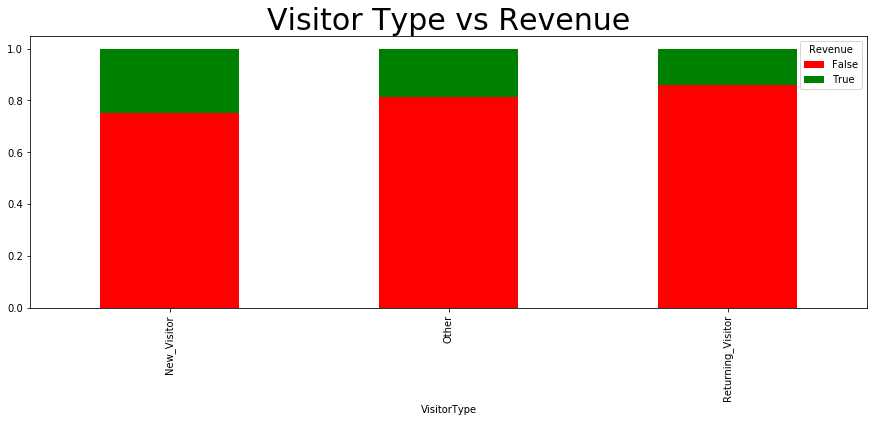

In [46]:
# visitor type vs revenue

df = pd.crosstab(shop['VisitorType'], shop['Revenue'])
df.div(df.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True, figsize = (15, 5), color = ['Red', 'green'])
plt.title('Visitor Type vs Revenue', fontsize = 30)
plt.show()

#### 2.2.3 Region vs Revenue

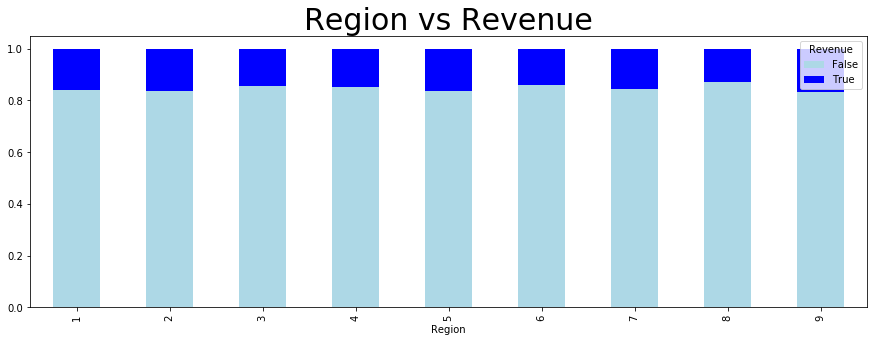

In [47]:
# region vs Revenue

df = pd.crosstab(shop['Region'], shop['Revenue'])
df.div(df.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True, figsize = (15, 5), color = ['lightblue', 'blue'])
plt.title('Region vs Revenue', fontsize = 30)
plt.show()

#### 2.2.4 Month vs Revenue

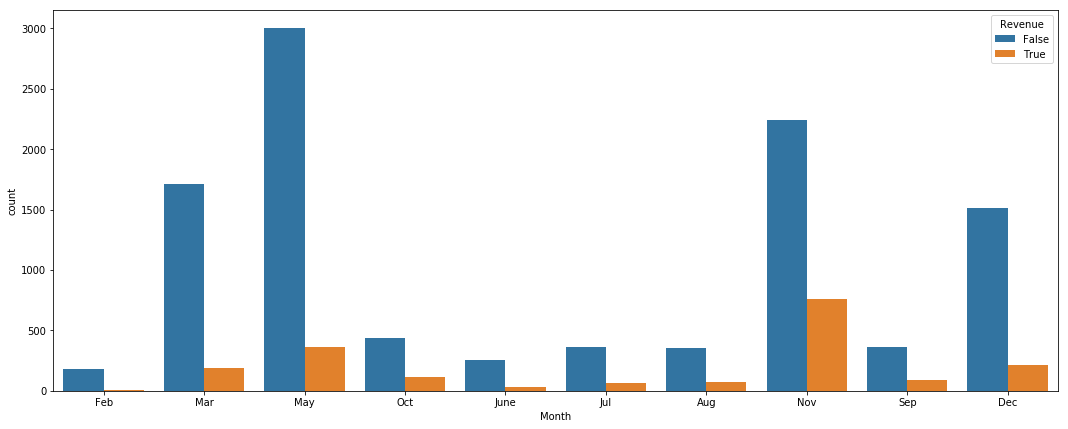

In [48]:
sns.countplot(shop['Month'],hue=shop['Revenue'])

#### 2.2.5 ProductRelated vs Revenue

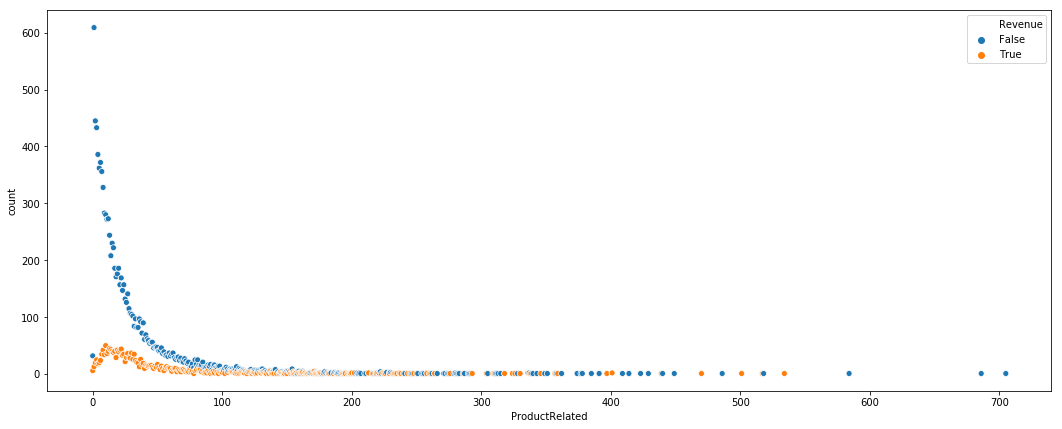

In [49]:
temp=shop['ProductRelated'].groupby([shop['ProductRelated'],shop['Revenue']]).count().reset_index(name='count')
sns.scatterplot(temp['ProductRelated'],temp['count'],hue=temp['Revenue'])

#### 2.2.6 Administrative vs Revenue

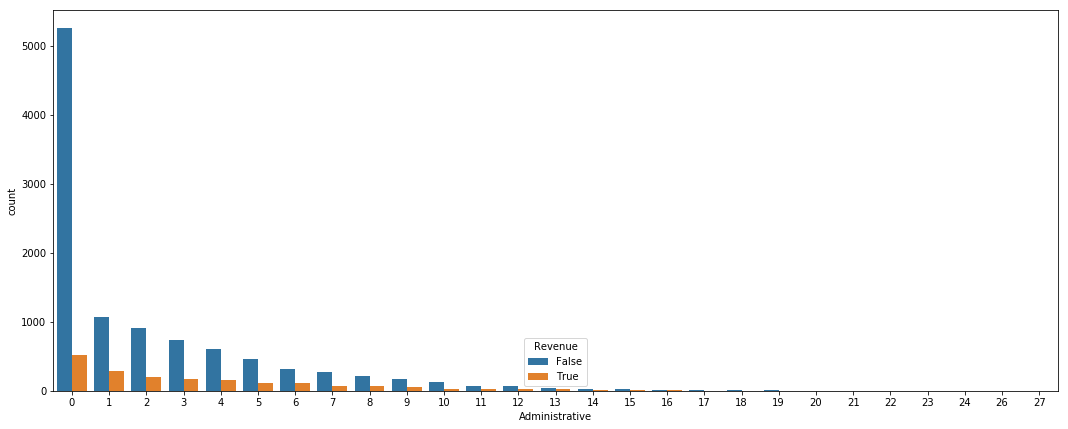

In [50]:
sns.countplot(shop['Administrative'],hue=shop['Revenue'])

#### 2.2.6 Informational vs Revenue

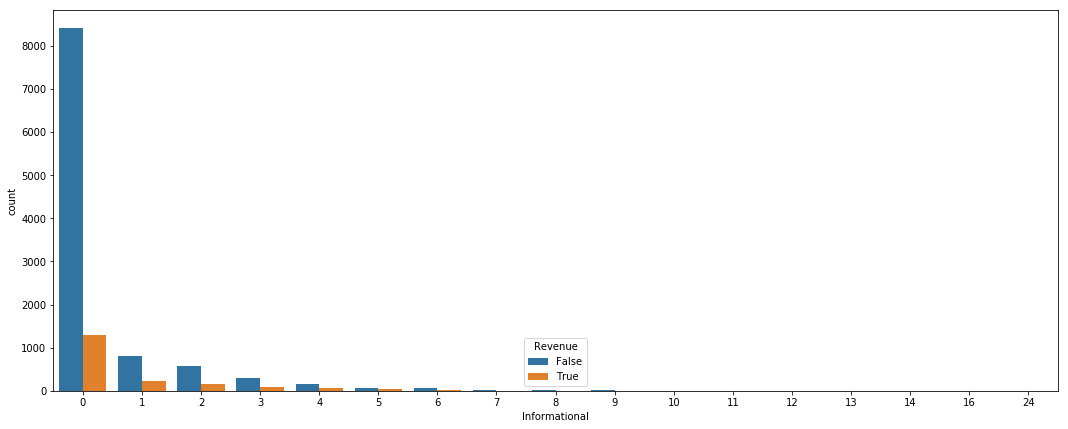

In [51]:
sns.countplot(shop['Informational'],hue=shop['Revenue'])

## 3.)Scaling and Dividing Data to Train Test Split

In [0]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.preprocessing import StandardScaler


In [0]:
shop=pd.get_dummies(data=shop,columns=['Month','VisitorType'])
x=shop.drop('Revenue',axis=1)
y=shop['Revenue']

sc=StandardScaler()
x=sc.fit_transform(x)

In [0]:
def Models(x_train,y_train,x_test,y_test):
    
    x_train=x_train
    y_train=y_train
    x_test=x_test
    y_test=y_test

    
    print("LOGISTIC REGRESSION")
    lg = LogisticRegression()
    lg.fit(x_train, y_train)
    ypred = lg.predict(x_test)
    #confusion_matrix = confusion_matrix(y_test, ypred)
    print("Confusion matrix for Logistic:",confusion_matrix(y_test, ypred))
    print("Accuracy score for Logistic:",accuracy_score(y_test, ypred))
    print("Classification Report for Logistic report",classification_report(y_test, ypred, target_names=['Yes', 'No']))

    print("DECISION TREE")
    dt=DecisionTreeClassifier(criterion = 'gini',max_depth=4)
    dt.fit(x_train,y_train)
    ypred2=dt.predict(x_test)
    cm2=metrics.confusion_matrix(y_test,ypred2)
    print("Confusion matrix for Decision Tree:",cm2)
    acc2=metrics.accuracy_score(y_test,ypred2)
    print("Accuracy score for Decision Tree:",acc2)
    cr2=metrics.classification_report(y_test,ypred2)
    print("Classification Report for Logistic report")
    print(cr2)

    print("Naive Bayes Gaussian")
    gnb = GaussianNB()
    gnb.fit(x_train, y_train)
    ypred3=gnb.predict(x_test)
    cm3=metrics.confusion_matrix(y_test,ypred3)
    print("Confusion matrix for Gaussian:",cm3)
    acc3=metrics.accuracy_score(y_test,ypred3)
    print("Accuracy score for Gaussian:",acc3)
    cr3=metrics.classification_report(y_test,ypred3)
    print("Classification Report for Gaussian",cr3)

    print("Naive Bayes Bernoulli")
    bnb = BernoulliNB()
    bnb.fit(x_train, y_train)
    ypred4=bnb.predict(x_test)
    cm4=metrics.confusion_matrix(y_test,ypred4)
    print("Confusion matrix for Bernoulli",cm4)
    acc4=metrics.accuracy_score(y_test,ypred4)
    print("Accuracy score for Bernoulli:",acc4)
    cr4=metrics.classification_report(y_test,ypred4)
    print("Classification Report for Bernoulli:",cr4)
    
    return

In [55]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=0)
Models(xtrain,ytrain,xtest,ytest)

LOGISTIC REGRESSION
Confusion matrix for Logistic: [[3008   69]
 [ 549   73]]
Accuracy score for Logistic: 0.8329278183292782
Classification Report for Logistic report               precision    recall  f1-score   support

         Yes       0.85      0.98      0.91      3077
          No       0.51      0.12      0.19       622

    accuracy                           0.83      3699
   macro avg       0.68      0.55      0.55      3699
weighted avg       0.79      0.83      0.79      3699

DECISION TREE
Confusion matrix for Decision Tree: [[2924  153]
 [ 210  412]]
Accuracy score for Decision Tree: 0.9018653690186537
Classification Report for Logistic report
              precision    recall  f1-score   support

       False       0.93      0.95      0.94      3077
        True       0.73      0.66      0.69       622

    accuracy                           0.90      3699
   macro avg       0.83      0.81      0.82      3699
weighted avg       0.90      0.90      0.90      3699

Naive 

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


#### Modelling after Oversampling

In [56]:
from imblearn.over_sampling import SMOTE
smt=SMOTE()
xtrain,ytrain=smt.fit_sample(xtrain,ytrain)
xtest,ytest=smt.fit_sample(xtest,ytest)

Models(xtrain,ytrain,xtest,ytest)

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LOGISTIC REGRESSION
Confusion matrix for Logistic: [[2517  560]
 [ 637 2440]]
Accuracy score for Logistic: 0.8054923626909327
Classification Report for Logistic report               precision    recall  f1-score   support

         Yes       0.80      0.82      0.81      3077
          No       0.81      0.79      0.80      3077

    accuracy                           0.81      6154
   macro avg       0.81      0.81      0.81      6154
weighted avg       0.81      0.81      0.81      6154

DECISION TREE
Confusion matrix for Decision Tree: [[2665  412]
 [  62 3015]]
Accuracy score for Decision Tree: 0.9229769255768606
Classification Report for Logistic report
              precision    recall  f1-score   support

       False       0.98      0.87      0.92      3077
        True       0.88      0.98      0.93      3077

    accuracy                           0.92      6154
   macro avg       0.93      0.92      0.92      6154
weighted avg       0.93      0.92      0.92      6154

Naive 

In [57]:
shop.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'Weekend',
       'Revenue', 'Month_Aug', 'Month_Dec', 'Month_Feb', 'Month_Jul',
       'Month_June', 'Month_Mar', 'Month_May', 'Month_Nov', 'Month_Oct',
       'Month_Sep', 'VisitorType_New_Visitor', 'VisitorType_Other',
       'VisitorType_Returning_Visitor'],
      dtype='object')